In [1]:
import pandas as pd
# Set max columns to display
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt

C:\Users\austinsh\AppData\Local\Temp\ipykernel_14524\3402816738.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Importing CSV files


# df_adjust_Limits = pd.read_csv('https://raw.githubusercontent.com/saust1/Project-OptiC4/main/1%20Preprocess/Continuous%20Data/contData_all.csv')

# df_adjustments = pd.read_csv('https://raw.githubusercontent.com/saust1/Project-OptiC4/main/CSV/PVs/adjust_limits.csv')


df_adjust_Limits = pd.read_csv(r"C:\Users\austinsh\Project-OptiC4\III Models\3 Model C4\5 Preprocessing - Slecected Features\Continuous Data\contData_all.csv")

df_adjustments = pd.read_csv(r"C:\Users\austinsh\Project-OptiC4\II Data\1 Collection\CSV\PVs\adjust_limits.csv")


In [3]:
num_columns = df_adjust_Limits.shape[1]
print("Number of features:", num_columns)

Number of features: 19


In [4]:
# # Convert 'Date' column to datetime in df_adjust_Limits and df_LD using the appropriate format
# df_adjust_Limits['Date'] = pd.to_datetime(df_adjust_Limits['Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# # Check for NaT entries in both dataframes
# nat_count_CD = df_adjust_Limits['Date'].isna().sum()

df_adjust_Limits.describe()

,425_pct_Al,C4_pct_Eth,C4_pct_H2O,HydWtr_pct_Ammonia,C4_pct_Hex,HydWtr_Na2O,Butanol,DI55102,DI55152,FC55552,FC55569,FC55576,FFC55553,FFC55555,LC55557,LC90366,LC90368,TC55552
count,97767.000000,97767.000000,97767.000000,97767.000000,97767.000000,97767.000000,97767.000000,97767.000000,97767.000000,97767.000000,97767.000000,97767.000000,97767.000000,97767.000000,97767.000000,97767.000000,97767.000000,97767.000000
mean,2.375719,1.556590,20.613789,0.967199,0.514113,0.959746,170.175619,0.925446,0.945162,26636.434000,5160.511621,295.740116,8.635558,1.845404,55.082645,46.807975,40.364888,140.448475
std,156.530915,3.700163,4.354269,0.218351,0.792687,3.649394,804.131895,0.075834,0.058403,15866.678532,2676.455851,288.022227,61.016133,27.625992,28.608611,26.236727,21.443954,59.810053
min,-9986.000000,0.001000,0.057000,0.021000,0.000000,-0.256120,0.000000,0.000000,0.000000,-12997.800000,0.000000,-9.608200,0.000000,0.000000,-0.627794,0.000000,0.000000,0.000000
25%,5.973400,0.681226,17.985850,0.861583,0.323000,0.389460,4.065555,0.882456,0.916241,17732.000000,5710.320000,0.000000,0.944282,0.720449,64.209750,26.871600,23.017150,141.871500
50%,6.120000,1.264480,20.057300,0.935140,0.412000,0.616626,7.800000,0.938131,0.943505,35766.300000,6437.650000,274.183000,0.988607,0.767982,69.283900,49.673100,46.228500,164.345000
75%,6.268150,1.671855,22.789000,1.034185,0.517739,1.002010,34.022900,0.983182,0.981383,38112.200000,6737.925000,460.854500,1.020140,0.786421,71.385900,67.386300,56.282600,178.306000
max,8.058320,90.136000,95.818000,10.726700,15.840400,279.492000,36301.200000,1.212410,1.317230,52000.000000,12933.400000,1537.300000,2955.150000,1224.330000,100.000000,87.901600,83.400400,213.521000


In [5]:
# Annotate all range adjustements with rationale

#df_adjustments = pd.read_csv(r"C:\Users\saust\OneDrive - Sasol\1 Project rC4\Data\CSV to PRocess\RangeD.csv")
df_adjustments

,Range,425_pct_Al,Butanol,Decanol,FC42428,FC52018,FC55003,FC55009,FC55102,FC55152,FC55552,FC55555,FC55569,FC55576,FFC55553,FFC55555,FI55580,FYC55553,LC52572,LC55553,LC55555,LC55557,LC55568,LC90366,LC90368,PI55004,PI55020,PI55560,TC52015,TC55552,TC55553,TC55555,TC55566,TI40050,TI55013,TI55014,TI55015,TI55016,TI55017,TI55021,TI55023,TI55565,TI90366,TI90368,AYC55580,DI52018,DI55102,DI55152,DI55580,TI52014,VI52558B
0,Min,0,0,0,0,5000,0,0,0,0,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,-10.0,-10.0,-4.7,0,100,100,100,0,0,0,0,0,0,0,0,0,150,0,0,0.5,0.8,0.75,0,0,0
1,Max,10,100,10,50000,50000,40000,3000,70000,70000,52000,70000,12800,1500,10,1,70000,60000,100,100,100,100,100,100,100,20.3,20.3,10.3,250.0,300,275,300,300,125,300,300,300,300,300,350,350,300,200,200,20,0.5,1.2,1.30,100,200,11


In [6]:
#Finds and removes system limit (Min/Max) values

# Assuming df_adjustments and df_adjust_Limits are your dataframes

# Extract the min and max rows from df_adjustments into separate Series
min_values = df_adjustments[df_adjustments['Range'] == 'Min'].iloc[0, 1:]
max_values = df_adjustments[df_adjustments['Range'] == 'Max'].iloc[0, 1:]

# Iterate through each column in df_adjust_Limits
for col in df_adjust_Limits.columns:
    # Check if the column exists in df_adjustments
    if col in min_values.index:
        # Get the min and max values for this column from df_adjustments
        min_val = min_values[col]
        max_val = max_values[col]
        
        # Filter out values in df_adjust_Limits that are less than min or greater than max
        df_adjust_Limits.loc[df_adjust_Limits[col] < min_val, col] = None
        df_adjust_Limits.loc[df_adjust_Limits[col] > max_val, col] = None


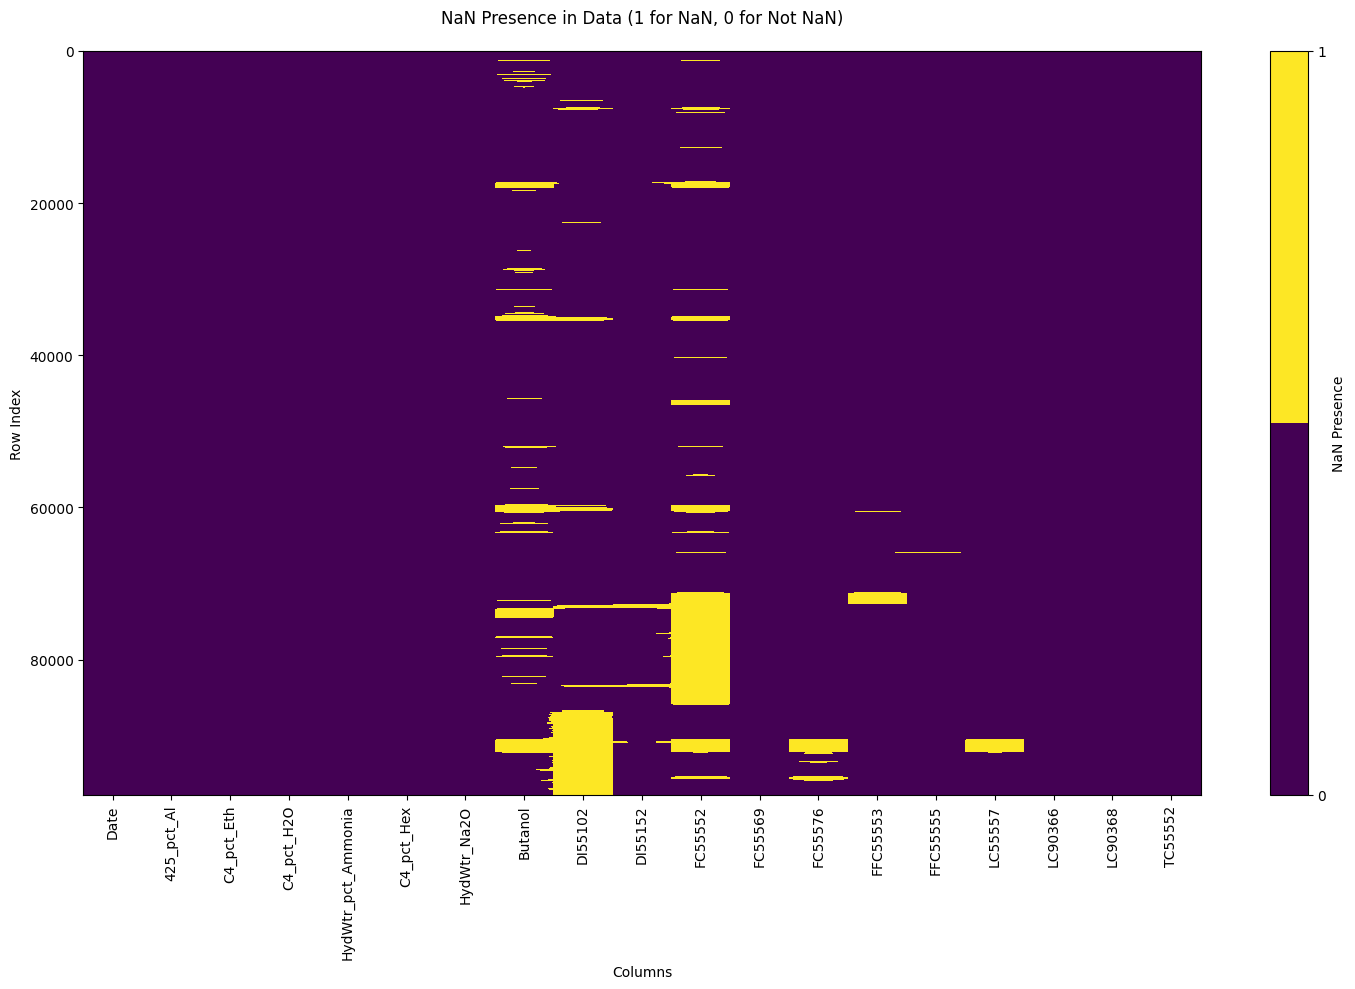

In [7]:
# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_adjust_Limits.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_adjust_Limits.shape[1]), df_adjust_Limits.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()

In [8]:
# Calculate the statistics for each column in df_adjust_Limits
total_rows = len(df_adjust_Limits)
non_nan_count = df_adjust_Limits.count()
nan_count = df_adjust_Limits.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_adjust_Limits.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0                 Date       97767          97767          0        0.000000
1           425_pct_Al       97767          97697         70        0.071599
2           C4_pct_Eth       97767          97767          0        0.000000
3           C4_pct_H2O       97767          97767          0        0.000000
4   HydWtr_pct_Ammonia       97767          97767          0        0.000000
5           C4_pct_Hex       97767          97767          0        0.000000
6          HydWtr_Na2O       97767          97767          0        0.000000
7              Butanol       97767          82170      15597       15.953236
8              DI55102       97767          83874      13893       14.210316
9              DI55152       97767          96480       1287        1.316395
10             FC55552       97767          74039      23728       24.269948
11             FC55569       97767          97763          4        0.004091

In [9]:
#Analysis of remaining NaNs suggests minimal impact - REMOVE

df_adjust_Limits = df_adjust_Limits.dropna()

# Calculate the statistics for each column in df_pivot
total_rows = len(df_adjust_Limits)
non_nan_count = df_adjust_Limits.count()
nan_count = df_adjust_Limits.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_adjust_Limits.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0                 Date       58749          58749          0             0.0
1           425_pct_Al       58749          58749          0             0.0
2           C4_pct_Eth       58749          58749          0             0.0
3           C4_pct_H2O       58749          58749          0             0.0
4   HydWtr_pct_Ammonia       58749          58749          0             0.0
5           C4_pct_Hex       58749          58749          0             0.0
6          HydWtr_Na2O       58749          58749          0             0.0
7              Butanol       58749          58749          0             0.0
8              DI55102       58749          58749          0             0.0
9              DI55152       58749          58749          0             0.0
10             FC55552       58749          58749          0             0.0
11             FC55569       58749          58749          0             0.0

In [10]:
# 59840 Records with all features included for preprocessing

df_adjust_Limits = df_adjust_Limits.sort_values('Date')
df_adjust_Limits = df_adjust_Limits.reset_index(drop=True)


# Save DataFrame to CSV file in the same directory as the Jupyter Notebook
# df_adjust_Limits.to_csv(r'C:\Users\steve\OneDrive\1. BAIUTEK\Project-OptiC4\1 Preprocess\Continuous Data\adjusted_Limits.csv', index=False)

#bordeCode
df_adjust_Limits.to_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model C4\5 Preprocessing - Slecected Features\Continuous Data\adjusted_Limits.csv', index=False)

In [11]:
df_adjust_Limits.describe()



,425_pct_Al,C4_pct_Eth,C4_pct_H2O,HydWtr_pct_Ammonia,C4_pct_Hex,HydWtr_Na2O,Butanol,DI55102,DI55152,FC55552,FC55569,FC55576,FFC55553,FFC55555,LC55557,LC90366,LC90368,TC55552
count,58749.000000,58749.000000,58749.000000,58749.000000,58749.000000,58749.000000,58749.000000,58749.000000,58749.000000,58749.000000,58749.000000,58749.000000,58749.000000,58749.000000,58749.000000,58749.000000,58749.000000,58749.000000
mean,6.156007,1.482584,21.425175,0.988184,0.546025,0.942882,11.962564,0.943126,0.933108,35312.569259,6624.872902,371.426412,0.995352,0.771099,69.522364,45.628719,36.522146,168.174319
std,0.327066,3.562871,4.507699,0.214473,0.863182,4.011604,15.608899,0.054624,0.032043,5772.188678,496.756716,254.032390,0.061234,0.028924,3.155705,28.888482,20.326790,16.127633
min,0.155707,0.001000,0.057000,0.070270,0.000000,0.000000,0.000000,0.800002,0.809662,7377.560000,0.000000,0.000000,0.042564,0.000000,0.000000,0.000000,0.006367,98.687500
25%,6.009710,0.634452,18.838000,0.875294,0.336611,0.458320,3.842080,0.908179,0.912638,33749.800000,6346.930000,197.761000,0.972616,0.757565,67.030300,20.164500,19.641900,155.242000
50%,6.150930,1.142670,21.444600,0.943749,0.437783,0.673663,6.050000,0.948168,0.933281,37915.700000,6580.400000,344.749000,0.998399,0.771551,70.119300,46.435200,41.280200,172.427000
75%,6.312280,1.720800,23.344800,1.046050,0.541010,0.995499,12.190000,0.984087,0.953225,39006.200000,6837.160000,546.466000,1.020290,0.787966,71.861100,76.866500,52.052500,180.694000
max,8.058320,77.165000,95.818000,3.744840,13.392400,279.492000,99.950000,1.120200,1.039590,52000.000000,10503.000000,1461.990000,1.475490,0.998409,100.000000,87.901600,81.210800,203.179000


In [12]:
# 59840 Records with all features included for preprocessing

In [13]:
from datetime import datetime

# Get the current date and time
current_date_time = datetime.now()

# Print the current date and time
print(current_date_time)


2024-05-06 22:03:05.624963
